<a href="https://colab.research.google.com/github/jijan67/Multi-Weather-Classification-System/blob/main/Multi_Weather_Classification_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from PIL import Image
import itertools

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

print('Modules loaded successfully')

Modules loaded successfully


In [ ]:
import os
import pandas as pd


data_dir = '/content/drive/MyDrive/MultiWeatherDataset'

filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    pics = os.listdir(foldpath)
    for pic in pics:
        pic_path = os.path.join(foldpath, pic)
        filepaths.append(pic_path)
        labels.append(fold)


FSeries = pd.Series(filepaths, name='Pic Path')
LSeries = pd.Series(labels, name='Labels')

df = pd.concat([FSeries, LSeries], axis=1)


In [ ]:
df

,Pic Path,Labels
0,/content/drive/MyDrive/MultiWeatherDataset/Rai...,Rain
1,/content/drive/MyDrive/MultiWeatherDataset/Rai...,Rain
2,/content/drive/MyDrive/MultiWeatherDataset/Rai...,Rain
3,/content/drive/MyDrive/MultiWeatherDataset/Rai...,Rain
4,/content/drive/MyDrive/MultiWeatherDataset/Rai...,Rain
...,...,...
1947,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog
1948,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog
1949,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog
1950,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog


In [ ]:
train_df, dummy_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['Labels'])
test_df,  valid_df= train_test_split(dummy_df, test_size=0.5, random_state=42, stratify=dummy_df['Labels'])

In [ ]:
train_df

,Pic Path,Labels
6,/content/drive/MyDrive/MultiWeatherDataset/Rai...,Rain
222,/content/drive/MyDrive/MultiWeatherDataset/Sun...,Sunrise
991,/content/drive/MyDrive/MultiWeatherDataset/Shi...,Shine
1279,/content/drive/MyDrive/MultiWeatherDataset/Sno...,Snow
1138,/content/drive/MyDrive/MultiWeatherDataset/Sno...,Snow
...,...,...
288,/content/drive/MyDrive/MultiWeatherDataset/Sun...,Sunrise
1108,/content/drive/MyDrive/MultiWeatherDataset/Shi...,Shine
1278,/content/drive/MyDrive/MultiWeatherDataset/Sno...,Snow
1861,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog


In [ ]:
test_df

,Pic Path,Labels
1340,/content/drive/MyDrive/MultiWeatherDataset/San...,Sand
872,/content/drive/MyDrive/MultiWeatherDataset/Shi...,Shine
1907,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog
1020,/content/drive/MyDrive/MultiWeatherDataset/Shi...,Shine
1329,/content/drive/MyDrive/MultiWeatherDataset/San...,Sand
...,...,...
1871,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog
1222,/content/drive/MyDrive/MultiWeatherDataset/Sno...,Snow
1159,/content/drive/MyDrive/MultiWeatherDataset/Sno...,Snow
593,/content/drive/MyDrive/MultiWeatherDataset/Clo...,Cloudy


In [ ]:
valid_df

,Pic Path,Labels
1008,/content/drive/MyDrive/MultiWeatherDataset/Shi...,Shine
1577,/content/drive/MyDrive/MultiWeatherDataset/San...,Sand
630,/content/drive/MyDrive/MultiWeatherDataset/Clo...,Cloudy
1812,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog
1115,/content/drive/MyDrive/MultiWeatherDataset/Shi...,Shine
...,...,...
90,/content/drive/MyDrive/MultiWeatherDataset/Rai...,Rain
1185,/content/drive/MyDrive/MultiWeatherDataset/Sno...,Snow
1296,/content/drive/MyDrive/MultiWeatherDataset/Sno...,Snow
1686,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog


In [ ]:
test_df.sample(10)

,Pic Path,Labels
1039,/content/drive/MyDrive/MultiWeatherDataset/Shi...,Shine
172,/content/drive/MyDrive/MultiWeatherDataset/Rai...,Rain
1688,/content/drive/MyDrive/MultiWeatherDataset/Fog...,Fog
760,/content/drive/MyDrive/MultiWeatherDataset/Clo...,Cloudy
1222,/content/drive/MyDrive/MultiWeatherDataset/Sno...,Snow
871,/content/drive/MyDrive/MultiWeatherDataset/Clo...,Cloudy
1350,/content/drive/MyDrive/MultiWeatherDataset/San...,Sand
503,/content/drive/MyDrive/MultiWeatherDataset/Sun...,Sunrise
761,/content/drive/MyDrive/MultiWeatherDataset/Clo...,Cloudy
732,/content/drive/MyDrive/MultiWeatherDataset/Clo...,Cloudy


In [ ]:
batch_size = 16
img_size = (224, 224)

gen = ImageDataGenerator()

train_gen = gen.flow_from_dataframe(train_df, x_col='Pic Path', y_col='Labels',target_size= img_size,
                                   class_mode= 'categorical', color_mode='rgb', shuffle = True,
                                   batch_size= batch_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Pic Path', y_col='Labels',target_size= img_size,
                                   class_mode= 'categorical', color_mode='rgb', shuffle = True,
                                   batch_size= batch_size)

test_gen = gen.flow_from_dataframe(test_df, x_col='Pic Path', y_col='Labels',target_size= img_size,
                                   class_mode= 'categorical', color_mode='rgb', shuffle = False,
                                   batch_size= batch_size)

Found 1756 validated image filenames belonging to 7 classes.
Found 98 validated image filenames belonging to 7 classes.
Found 98 validated image filenames belonging to 7 classes.


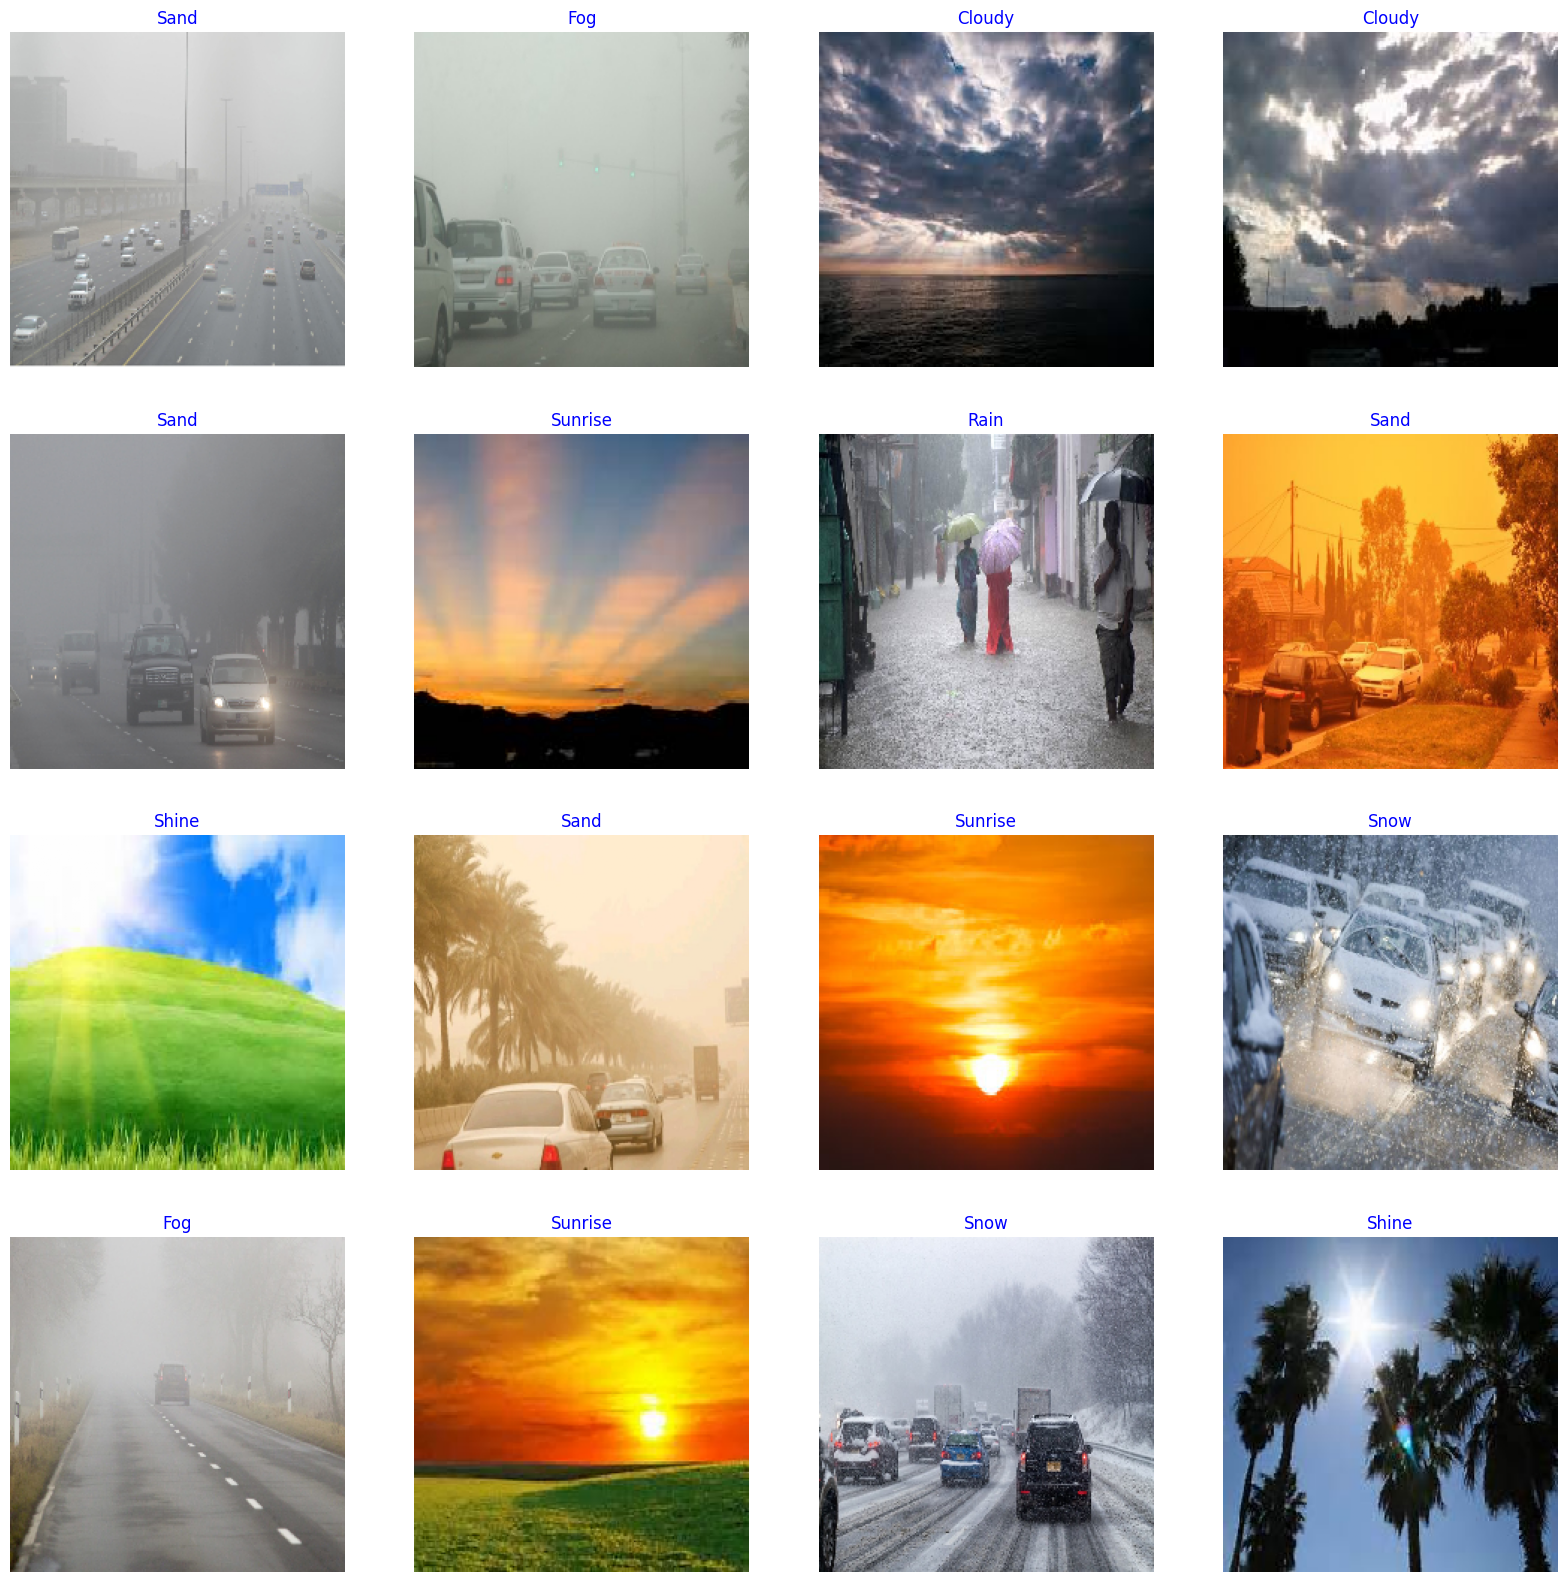

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet",
                                                               input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy',
              metrics= ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),
                        tf.keras.metrics.AUC()])

model.summary()

43941136/43941136 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                         

In [ ]:
epochs = 25

hist = model.fit(train_gen, epochs = epochs, verbose = 1, validation_data = valid_gen, shuffle = False)

Epoch 1/25
110/110 [==============================] - 1255s 11s/step - loss: 8.1235 - accuracy: 0.7232 - precision: 0.7698 - recall: 0.6760 - auc: 0.9442 - val_loss: 7.0502 - val_accuracy: 0.9490 - val_precision: 0.9485 - val_recall: 0.9388 - val_auc: 0.9969
Epoch 2/25
110/110 [==============================] - 31s 281ms/step - loss: 6.3408 - accuracy: 0.9095 - precision: 0.9288 - recall: 0.8844 - auc: 0.9923 - val_loss: 5.7646 - val_accuracy: 0.9388 - val_precision: 0.9583 - val_recall: 0.9388 - val_auc: 0.9968
Epoch 3/25
110/110 [==============================] - 32s 285ms/step - loss: 5.2248 - accuracy: 0.9356 - precision: 0.9543 - recall: 0.9032 - auc: 0.9959 - val_loss: 4.7747 - val_accuracy: 0.9592 - val_precision: 0.9688 - val_recall: 0.9490 - val_auc: 0.9965
Epoch 4/25
110/110 [==============================] - 31s 285ms/step - loss: 4.3007 - accuracy: 0.9562 - precision: 0.9762 - recall: 0.9362 - auc: 0.9982 - val_loss: 3.9955 - val_accuracy: 0.9388 - val_precision: 0.9381 - v

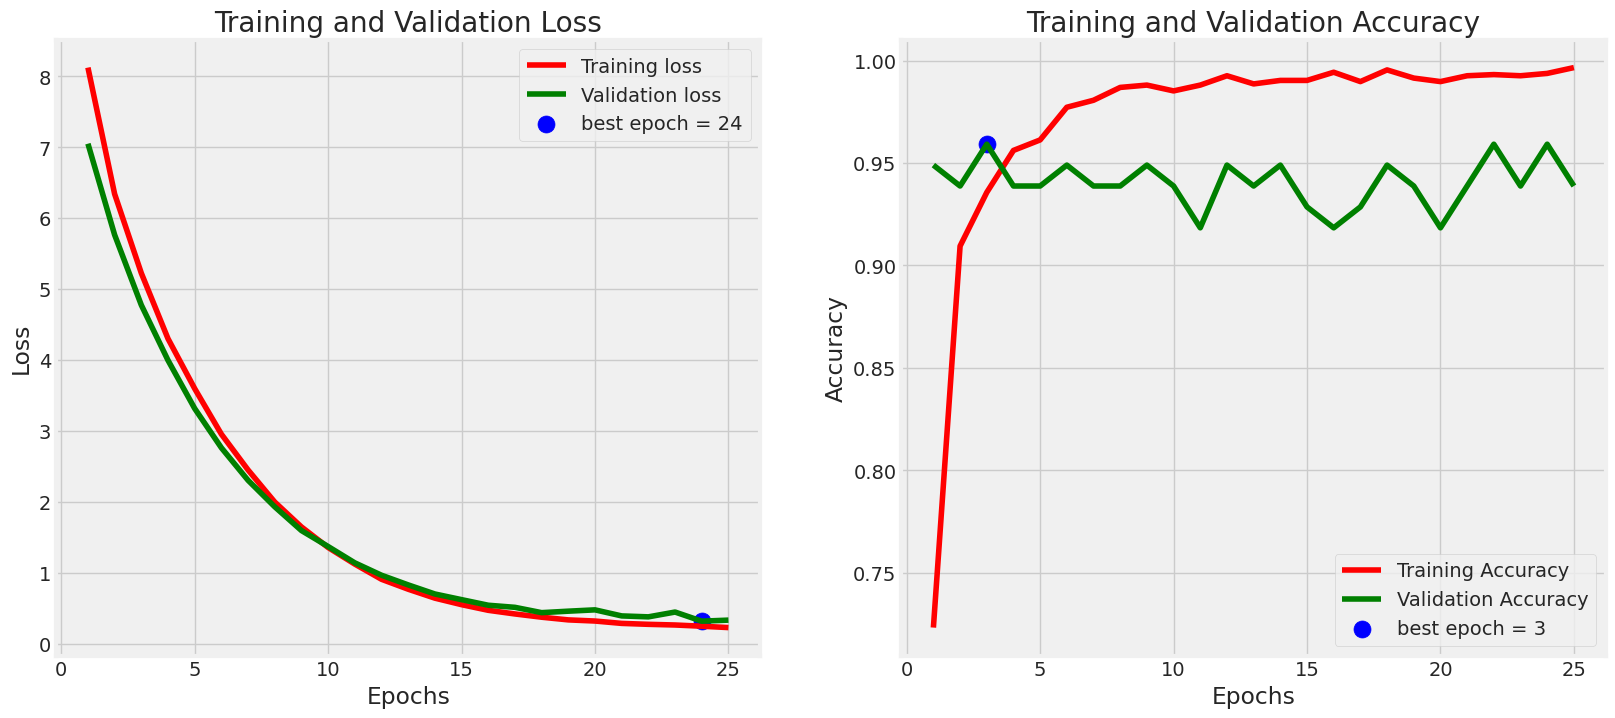

In [ ]:
# Define needed variables

tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch = {str(index_loss + 1)}'
acc_label = f'best epoch = {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label = 'Training loss')
plt.plot(Epochs, val_loss, 'g', label = 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
train_score = model.evaluate(train_gen)
valid_score = model.evaluate(valid_gen)
test_score = model.evaluate(test_gen)

7/7 [==============================] - 46s 8s/step - loss: 0.3550 - accuracy: 0.9388 - precision: 0.9485 - recall: 0.9388 - auc: 0.9963


In [ ]:
print('Train Loss : ', train_score[0])
print('Train Accuracy : ', train_score[1])
print('=' * 20)
print( )
print('Valid Loss : ', valid_score[0])
print('Valid Accuracy : ', valid_score[1])
print('=' * 20)
print( )
print('Test Loss : ', test_score[0])
print('Test Accuracy : ', test_score[1])

Train Loss :  0.18763262033462524
Train Accuracy :  0.9988610744476318

Valid Loss :  0.33149245381355286
Valid Accuracy :  0.9387755393981934

Test Loss :  0.35504862666130066
Test Accuracy :  0.9387755393981934


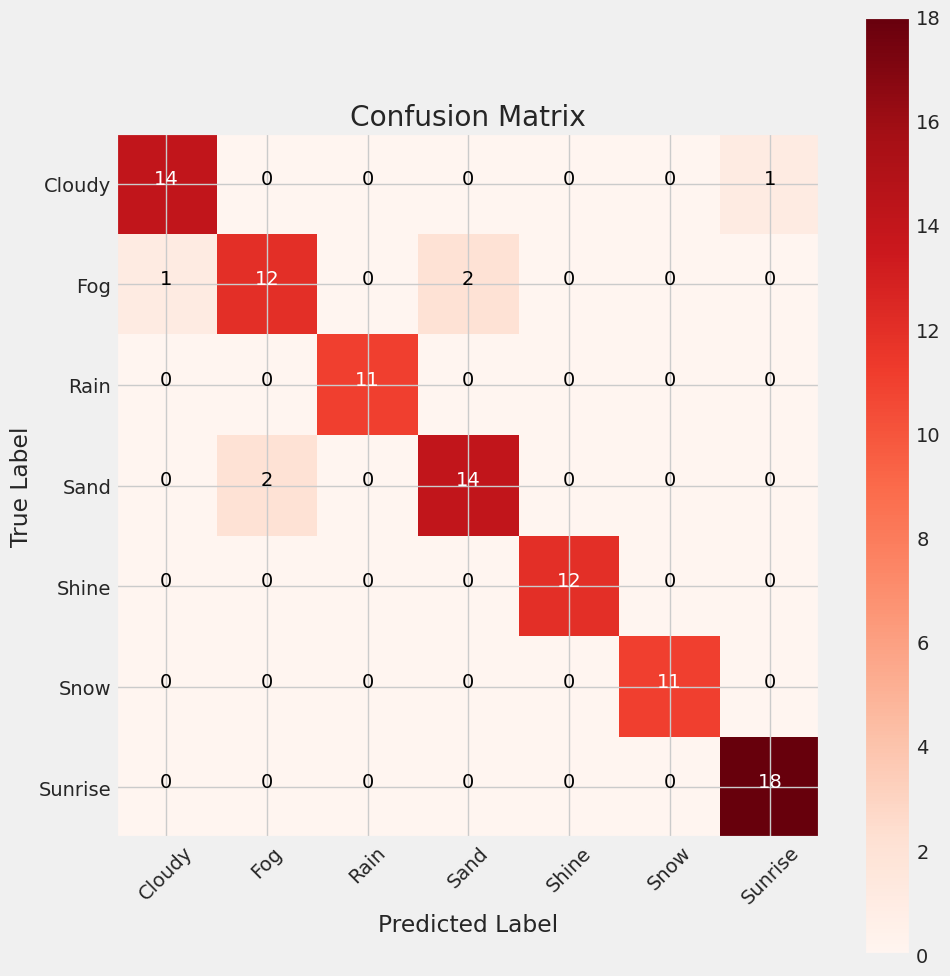

In [ ]:
preds = model.predict_generator(test_gen)
y_pred= np.argmax(preds,axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): #(5,5)
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      Cloudy       0.93      0.93      0.93        15
         Fog       0.86      0.80      0.83        15
        Rain       1.00      1.00      1.00        11
        Sand       0.88      0.88      0.88        16
       Shine       1.00      1.00      1.00        12
        Snow       1.00      1.00      1.00        11
     Sunrise       0.95      1.00      0.97        18

    accuracy                           0.94        98
   macro avg       0.94      0.94      0.94        98
weighted avg       0.94      0.94      0.94        98

